<a href="https://colab.research.google.com/github/wafaunnisa/PCD-Image-Enhancement2/blob/main/TUGAS_Image_Enhancement2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

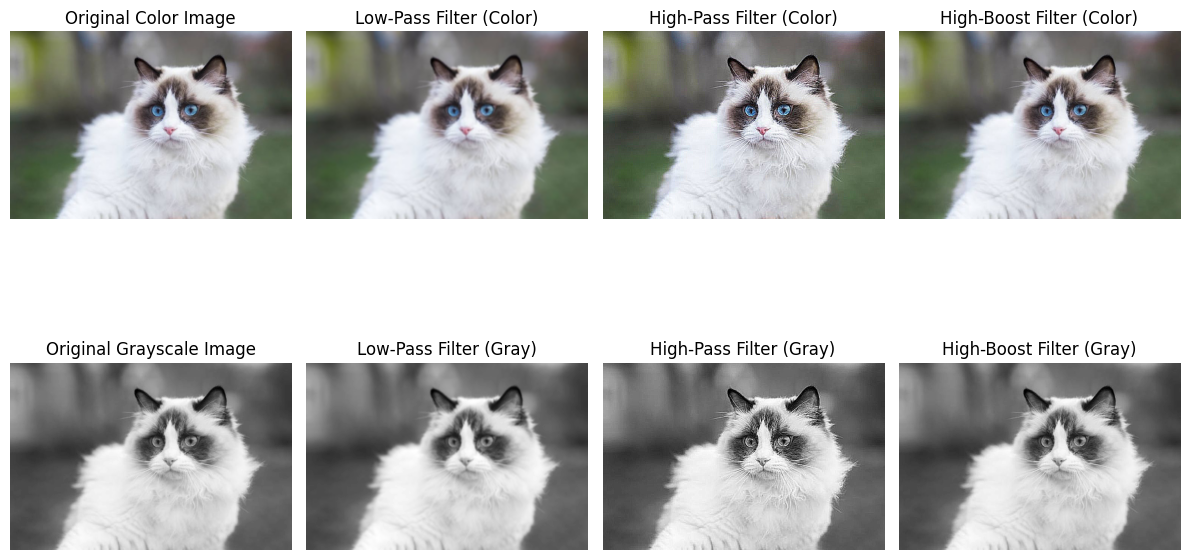

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan filter low-pass
def low_pass_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

# Fungsi untuk menerapkan filter high-pass
def high_pass_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Fungsi untuk menerapkan filter high-boost
def high_boost_filter(image, boost_factor=1.5):
    low_pass = low_pass_filter(image)
    return cv2.addWeighted(image, boost_factor, low_pass, -boost_factor + 1, 0)

# Membaca citra
image_color = cv2.imread("/content/Kucing-Ragdoll.jfif")

# Cek apakah gambar berhasil dimuat
if image_color is None:
    print("Error: Gambar tidak ditemukan. Periksa path.")
else:
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    # Menerapkan filter
    lpf_color = low_pass_filter(image_color)
    hpf_color = high_pass_filter(image_color)
    hbf_color = high_boost_filter(image_color)

    lpf_gray = low_pass_filter(image_gray)
    hpf_gray = high_pass_filter(image_gray)
    hbf_gray = high_boost_filter(image_gray)

    # Menampilkan hasil
    plt.figure(figsize=(12, 8))

    # Citra Berwarna
    plt.subplot(2, 4, 1)
    plt.title('Original Color Image')
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title('Low-Pass Filter (Color)')
    plt.imshow(cv2.cvtColor(lpf_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title('High-Pass Filter (Color)')
    plt.imshow(cv2.cvtColor(hpf_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title('High-Boost Filter (Color)')
    plt.imshow(cv2.cvtColor(hbf_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Citra Grayscale
    plt.subplot(2, 4, 5)
    plt.title('Original Grayscale Image')
    plt.imshow(image_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.title('Low-Pass Filter (Gray)')
    plt.imshow(lpf_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.title('High-Pass Filter (Gray)')
    plt.imshow(hpf_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 8)
    plt.title('High-Boost Filter (Gray)')
    plt.imshow(hbf_gray, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()